# Ratings Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

In [2]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\insss\\rate_review.csv')

In [3]:
df.head()

,Review,Rating
0,"Always wanted a good printer in my budget, and...",4
1,👍Epson Printer is very economical and useful f...,5
2,Superb Product with Superb Command Sensation &...,5
3,Very good nice 👍👍👍👍👍,5
4,Good quality.....Photo supper..Plastic body li...,5


In [4]:
df.dtypes

Review    object
Rating     int64
dtype: object

In [5]:
# Converting integer column into string column.

df['Rating']=df['Rating'].apply(str)

In [6]:
df.dtypes

Review    object
Rating    object
dtype: object

In [7]:
# Converting all words into lower case

df["Review"] = df["Review"].str.lower()

In [8]:
# Remove Special Characters,numbers and punctuations.

df['Review1']=df['Review'].str.replace("[^a-zA-Z#]"," ")

<ipython-input-8-7ac0a90ac87a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review1']=df['Review'].str.replace("[^a-zA-Z#]"," ")


In [9]:
df.head()

,Review,Rating,Review1
0,"always wanted a good printer in my budget, and...",4,always wanted a good printer in my budget and...
1,👍epson printer is very economical and useful f...,5,epson printer is very economical and useful f...
2,superb product with superb command sensation &...,5,superb product with superb command sensation ...
3,very good nice 👍👍👍👍👍,5,very good nice
4,good quality.....photo supper..plastic body li...,5,good quality photo supper plastic body li...


In [10]:
df.drop(['Review'],inplace=True,axis=1)

In [11]:
# Individual words considered as Tokens

tokenized_review=df['Review1'].apply(lambda x: x.split())
tokenized_review.head()

0    [always, wanted, a, good, printer, in, my, bud...
1    [epson, printer, is, very, economical, and, us...
2    [superb, product, with, superb, command, sensa...
3                                   [very, good, nice]
4    [good, quality, photo, supper, plastic, body, ...
Name: Review1, dtype: object

In [12]:
# Making a Stop Words list
nltk.download('stopwords')

stopwords= nltk.corpus.stopwords.words('english')
stopwords[0:15]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

In [13]:
# Removal of Stop Words

def rem_stop(tokenized_txt):
    txt_clean=[word for word in tokenized_txt if word not in stopwords]
    return txt_clean

In [14]:
tokenized_review=tokenized_review.apply(lambda x: rem_stop(x))
tokenized_review.head()

0    [always, wanted, good, printer, budget, get, e...
1    [epson, printer, economical, useful, home, off...
2    [superb, product, superb, command, sensation, ...
3                                         [good, nice]
4    [good, quality, photo, supper, plastic, body, ...
Name: Review1, dtype: object

In [15]:
# Stem the words

from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_review=tokenized_review.apply(lambda sentence: 
                                        [stemmer.stem(word) 
                                         for word in sentence])
tokenized_review.head()

0    [alway, want, good, printer, budget, get, epso...
1    [epson, printer, econom, use, home, offic, cop...
2    [superb, product, superb, command, sensat, cle...
3                                         [good, nice]
4    [good, qualiti, photo, supper, plastic, bodi, ...
Name: Review1, dtype: object

In [16]:
# Combine words into single sentence

for i in range(len(tokenized_review)):
    tokenized_review[i]=" ".join(tokenized_review[i])
df['clean_review']=tokenized_review
df.head()

,Rating,Review1,clean_review
0,4,always wanted a good printer in my budget and...,alway want good printer budget get epson provi...
1,5,epson printer is very economical and useful f...,epson printer econom use home offic copi print...
2,5,superb product with superb command sensation ...,superb product superb command sensat clear fan...
3,5,very good nice,good nice
4,5,good quality photo supper plastic body li...,good qualiti photo supper plastic bodi light w...


In [17]:
# Dropping Review2 column

df.drop(['Review1'],axis=1,inplace=True)

## EDA

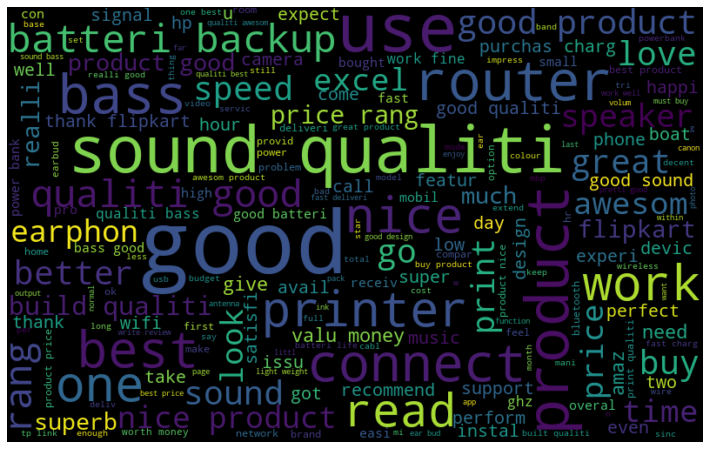

In [18]:
# Visualize the frequent words

all_words=" ".join([sentence for sentence in df['clean_review']])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800, height=500, random_state=45, max_font_size=100).generate(all_words)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

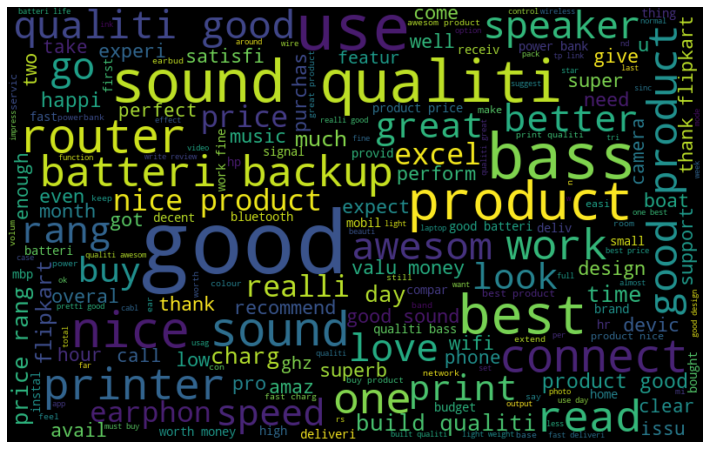

In [19]:
#frequent words visualization for positive reviews
all_words=" ".join([sentence for sentence in df['clean_review'][df['Rating']=='5']]) or " ".join([sentence for sentence in df['clean_review'][df['Rating']=='4']])

wordcloud=WordCloud(width=800, height=500, random_state=45, max_font_size=100).generate(all_words)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

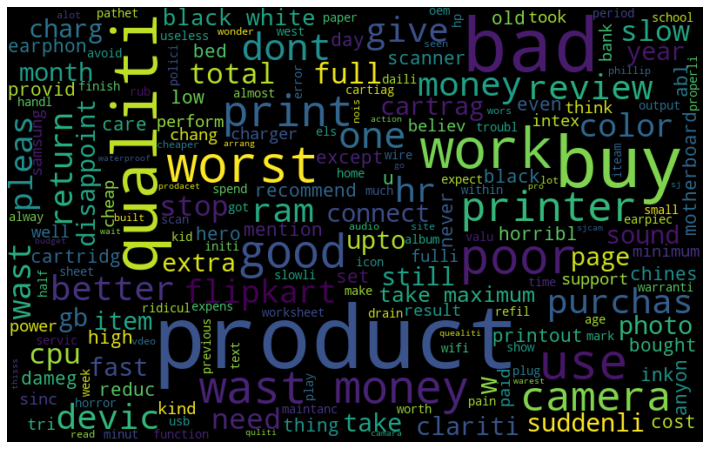

In [20]:
#frequent words visualization for negative reviews
all_words=" ".join([sentence for sentence in df['clean_review'][df['Rating']=='1']])

wordcloud=WordCloud(width=800, height=500, random_state=45, max_font_size=100).generate(all_words)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
# Extracting Positive/Negative words from tweets

def extract(tweets,val):
    pos_words=[]
    neg_words=[]
    if val==1:
        for tweet in tweets:
            p=tweet.split()
            pos_words.extend(p) # appending list to list
        return pos_words
    else:
        for tweet in tweets:
            n=tweet.split()
            neg_words.extend(n) # appending list to list
        return neg_words

In [22]:
# Extracting all the words from Positive Review 
positive_words=extract(df['clean_review'][df['Rating']=='5'],1)

# Extracting all the words from Negative Review 
negative_words=extract(df['clean_review'][df['Rating']=='1'],0)

In [23]:
positive_words[:10]

['epson',
 'printer',
 'econom',
 'use',
 'home',
 'offic',
 'copi',
 'print',
 'speed',
 'normal']

In [24]:
negative_words[:10]

['dameg',
 'product',
 'horribl',
 'printer',
 'give',
 'error',
 'almost',
 'daili',
 'wifi',
 'print']

In [25]:
freq=nltk.FreqDist(positive_words)
d= pd.DataFrame({'Positive words':list(freq.keys()),
               'Count':list(freq.values())})
d.head()

,Positive words,Count
0,epson,8
1,printer,175
2,econom,4
3,use,443
4,home,63


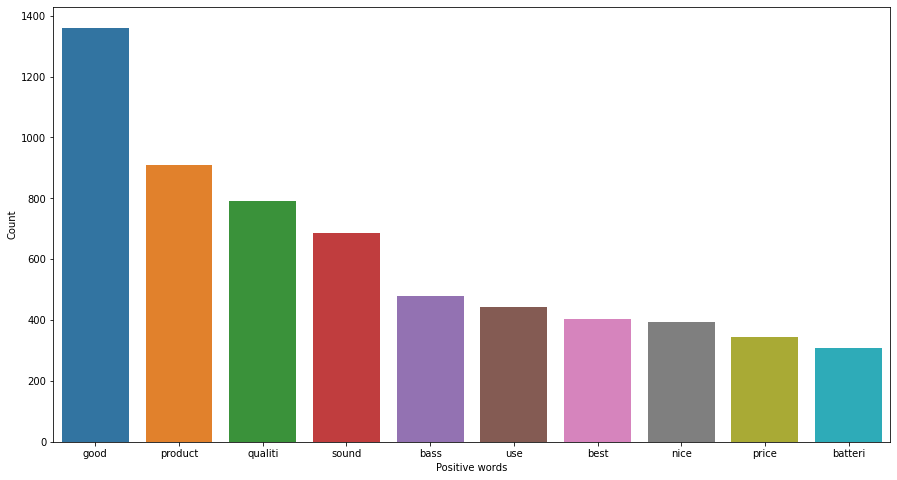

In [26]:
# Plotting Top10 positive words

d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,8))
sns.barplot(data=d,x='Positive words',y='Count')
plt.show()

In [27]:
freq=nltk.FreqDist(negative_words)
d= pd.DataFrame({'Negative words':list(freq.keys()),
               'Count':list(freq.values())})
d.head()

,Negative words,Count
0,dameg,2
1,product,45
2,horribl,2
3,printer,9
4,give,6


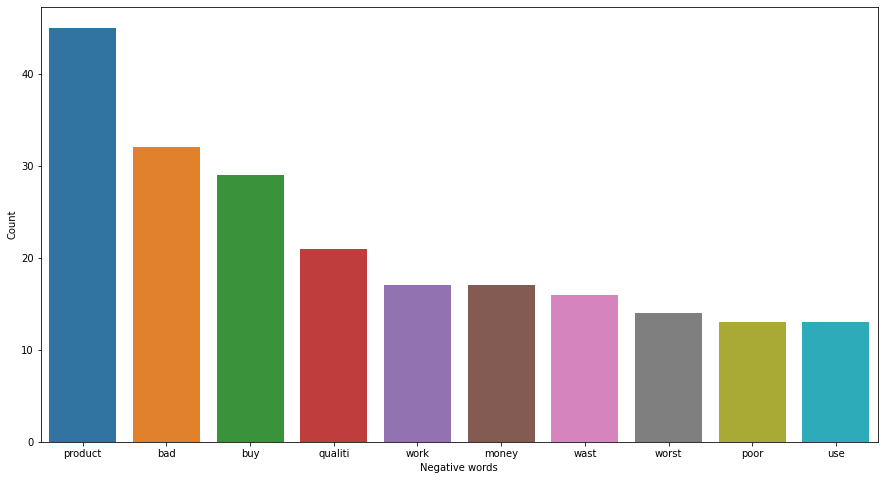

In [28]:
# Plotting Top10 negative words

d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,8))
sns.barplot(data=d,x='Negative words',y='Count')
plt.show()

## Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Rating']=lab.fit_transform(df['Rating'].values.reshape(-1,1))
df.head()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Rating,clean_review
0,3,alway want good printer budget get epson provi...
1,4,epson printer econom use home offic copi print...
2,4,superb product superb command sensat clear fan...
3,4,good nice
4,4,good qualiti photo supper plastic bodi light w...


## Feature Selection

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)
bow = bow_vectorizer.fit_transform(df['clean_review'])

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['Rating'], 
                                        random_state=42, test_size=0.2)

## Model Training

In [32]:
# fitting naive bayes to the training set
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
 
classifier = MultinomialNB();
classifier.fit(x_train, y_train)
 
# predicting test set results
y_pred = classifier.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score,classification_report

nb_clas=classification_report(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print(nb_clas)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.00      0.00      0.00         6
           2       0.17      0.14      0.15        37
           3       0.21      0.14      0.17        85
           4       0.73      0.81      0.77       323

    accuracy                           0.62       461
   macro avg       0.32      0.32      0.32       461
weighted avg       0.57      0.62      0.59       461



In [34]:
# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  5,   0,   1,   1,   3],
       [  0,   0,   0,   2,   4],
       [  0,   0,   5,   5,  27],
       [  1,   1,   7,  12,  64],
       [  4,   5,  16,  36, 262]], dtype=int64)